### Package loading

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Loading data

In [2]:
clust_data=pd.read_excel("Online Retail.xlsx")

In [3]:
clust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Feature engineering

In [6]:
clust_data["Order_price"]=clust_data["Quantity"]*clust_data["UnitPrice"]
clust_data["Order_status"]=["Done" if order_price>0 else "Cancelled" for order_price in clust_data["Order_price"]]
clust_data["Year"]=clust_data["InvoiceDate"].dt.year
clust_data["Month"]=clust_data["InvoiceDate"].dt.month
clust_data["Day"]=clust_data["InvoiceDate"].dt.day
clust_data["Hour"]=clust_data["InvoiceDate"].dt.hour
clust_data["Minute"]=clust_data["InvoiceDate"].dt.minute

### Data wrangling

In [7]:
## How many not defined data per columns

clust_data.isna().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
Order_price          0
Order_status         0
Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [8]:
clust_data[clust_data["Order_status"]=="Cancelled"].isna().sum()

InvoiceNo          0
StockCode          0
Description     1454
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID      2860
Country            0
Order_price        0
Order_status       0
Year               0
Month              0
Day                0
Hour               0
Minute             0
dtype: int64

In [9]:
cancelled=clust_data[clust_data["Order_status"]=="Cancelled"]
Done=clust_data[clust_data["Order_status"]=="Done"]

In [10]:
cancelled[cancelled["Description"].isna()].groupby("Country").count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Order_price,Order_status,Year,Month,Day,Hour,Minute
Country,,,,,,,,,,,,,,
United Kingdom,1454,1454,0,1454,1454,1454,0,1454,1454,1454,1454,1454,1454,1454


For orders without `Description` label have all 0.0 as `UnitPrice` then it is difficult to track these product and at the same time we haven't `CustomerID`. Then these rows can't be useful for this clutering, subquently we will drop then from our data.

In [33]:
clust_data=clust_data[clust_data["Description"].notna()]
clust_data["CustomerID"]=clust_data["CustomerID"].astype("object")

### Data description

In [32]:
### Data description

clust_data[["Quantity","UnitPrice","Order_price"]].describe()

,Quantity,UnitPrice,Order_price
count,540455.000000,540455.000000,540455.000000
mean,9.603129,4.623519,18.036188
std,218.007598,96.889628,379.318894
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.480000
50%,3.000000,2.080000,9.840000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


- We have `std` high than `mean` for both variables Quantity and UnitPrice.Then we have a high varaiance in our data that can be explain by pareto law as 20% of customers create 80% turnover. And also the products have a significant difference in price.

- As mentionned in InvoiceNo we have some orders cancelled, the most high number of items order cancelled is 80995 with 168469 `Money Unit`.

- Finally our data is very skewed as we can noticed with std>mean, that can lead by considering some observation as outliers.

<AxesSubplot: xlabel='Country'>

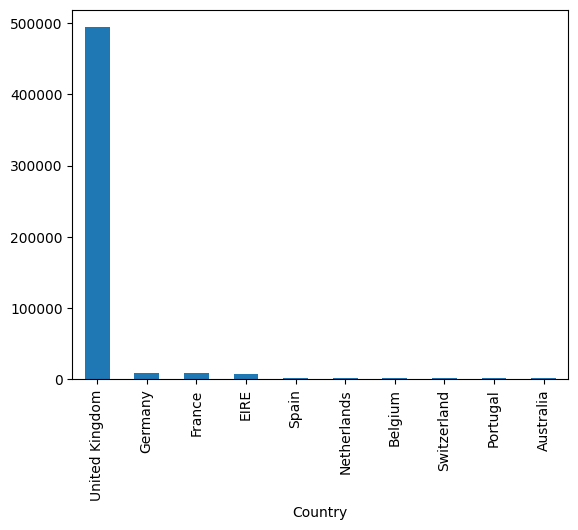

In [35]:
order_per_country=clust_data.groupby("Country").count().sort_values(by="StockCode",ascending=False)

order_per_country["StockCode"].iloc[:10].plot(kind="bar")

<AxesSubplot: xlabel='Description'>

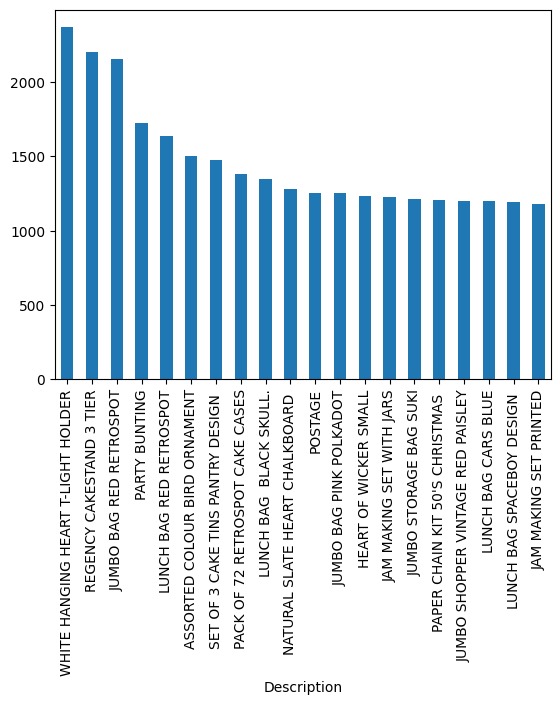

In [34]:
order_per_product=clust_data.groupby("Description").count().sort_values(by="StockCode",ascending=False)

order_per_product["StockCode"].iloc[:20].plot(kind="bar")

In [37]:
clust_data["Description"].nunique()

4223

<AxesSubplot: xlabel='Month'>

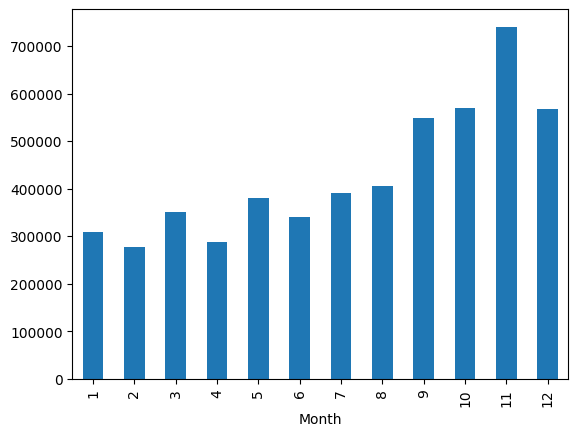

In [58]:
clust_data.groupby("Month").sum()["Quantity"].plot(kind="bar")

<AxesSubplot: xlabel='Day'>

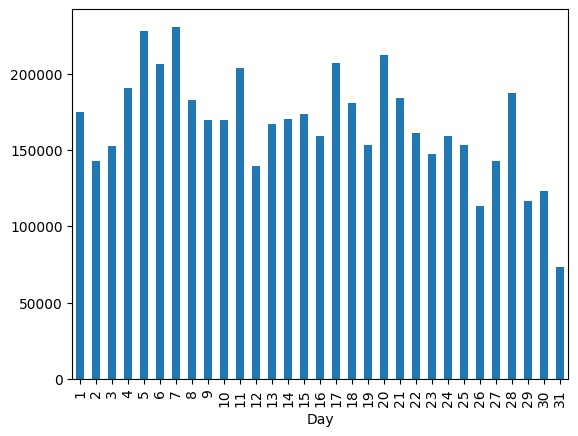

In [59]:
clust_data.groupby("Day").sum()["Quantity"].plot(kind="bar")

<AxesSubplot: xlabel='Hour'>

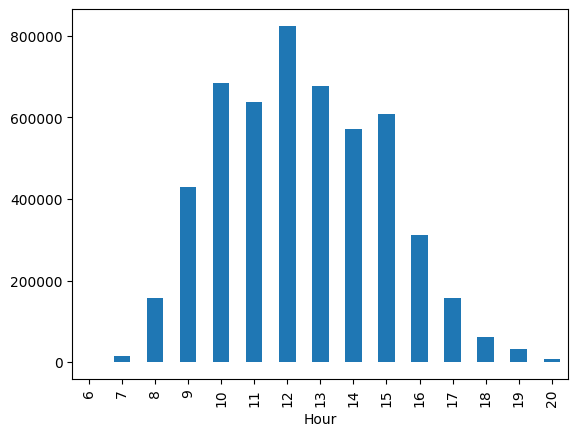

In [60]:
clust_data.groupby("Hour").sum()["Quantity"].plot(kind="bar")

<AxesSubplot: xlabel='Order_status'>

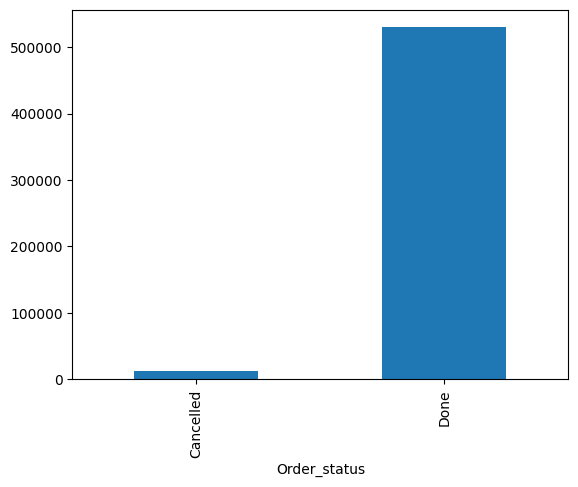

In [103]:
clust_data.groupby("Order_status").count()["InvoiceNo"].plot(kind="bar")